In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from a CSV file
df = pd.read_csv('C:/Users/dell/Documents/DSN data science/Machine Learning Dataset/Data Preprocessing and Visualization - Day 3/titanic_train.csv', delimiter = ',')

df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [3]:
# Display summary/descriptive statistics of the dataset
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [5]:
# Display sum of missing values per column
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [6]:
# Displays percentage of sum  0f missing values per column
df.isnull().sum() * 100/ len(df)

passenger_id     0.000000
pclass           0.000000
name             0.000000
sex              0.000000
age             20.470588
sibsp            0.000000
parch            0.000000
ticket           0.000000
fare             0.117647
cabin           77.529412
embarked         0.117647
boat            63.764706
body            91.411765
home.dest       45.411765
survived         0.000000
dtype: float64

In [7]:
# Handling missing values
# For age, fill missing values with the mean age
df['age'].fillna(df['age'].mean(), inplace=True)

In [8]:
# For fare, fill missing values with the mean fare
df['fare'].fillna(df['fare'].mean(), inplace=True)

In [9]:
# For embarked, fill missing values with the mode (most frequent value)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [10]:
# Drop columns with a high percentage of missing values (e.g., cabin, boat, home.dest), 
# i am keeoing boat because i want o know if body was found when the passenger didn't survive
df.drop(['cabin', 'boat', 'home.dest'], axis=1, inplace=True)

In [11]:
# Confirming that missing values have been handled
print(df.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
embarked          0
body            777
survived          0
dtype: int64


In [12]:
#printing the cleaned DataFrame
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,body,survived
0,1216,3,"Smyth, Miss. Julia",female,29.519847,0,0,335432,7.7333,Q,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.000000,0,0,315089,8.6625,S,NaN,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,345773,24.1500,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,S,NaN,1
4,576,2,"Veal, Mr. James",male,40.000000,0,0,28221,13.0000,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.000000,0,0,680,50.0000,S,NaN,0
846,174,1,"Kent, Mr. Edward Austin",male,58.000000,0,0,11771,29.7000,C,258.0,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.000000,1,0,244367,26.0000,S,NaN,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.000000,1,1,SOTON/O.Q. 3101315,13.7750,S,NaN,0


In [13]:
#changing the datatype of the column age from float to int
df['age'] = df['age'].astype(int)

df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,body,survived
0,1216,3,"Smyth, Miss. Julia",female,29,0,0,335432,7.7333,Q,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38,0,0,315089,8.6625,S,NaN,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30,1,1,345773,24.1500,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54,1,3,29105,23.0000,S,NaN,1
4,576,2,"Veal, Mr. James",male,40,0,0,28221,13.0000,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55,0,0,680,50.0000,S,NaN,0
846,174,1,"Kent, Mr. Edward Austin",male,58,0,0,11771,29.7000,C,258.0,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24,1,0,244367,26.0000,S,NaN,1
848,1112,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,S,NaN,0


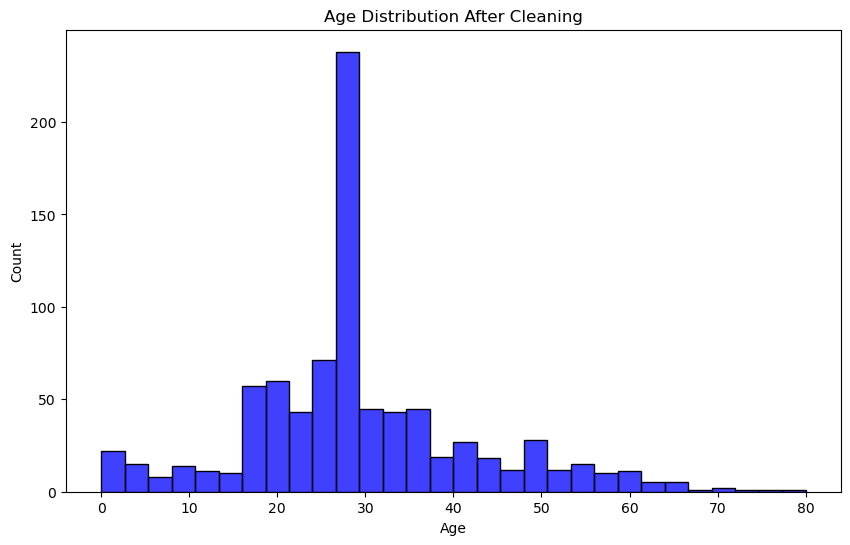

In [14]:
# Visualize data (example: age distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], color='blue')
plt.title('Age Distribution After Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [15]:
# Group data by passenger class and calculate the mean survival rate
survival_by_class = df.groupby('pclass')['survived'].mean()

survival_by_class

pclass
1    0.606796
2    0.457831
3    0.234310
Name: survived, dtype: float64

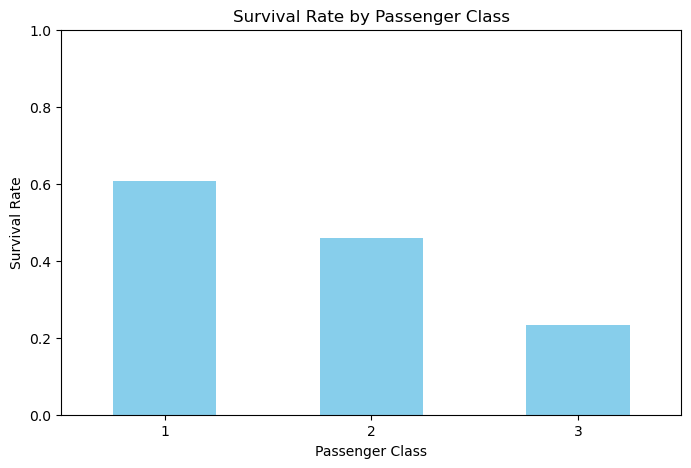

In [16]:
# Create a bar chart
plt.figure(figsize=(8, 5))
survival_by_class.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit to represent survival rate percentage
plt.show()

### Preprocessing the Data

In [17]:
from sklearn.preprocessing import LabelEncoder

# Feature Encoding
label_encoders = {}
for column in ['sex', 'embarked']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [27]:
#counting the no of each sex 0 for female 1 for male using .value_counts
df['sex'].value_counts()

sex
1    551
0    299
Name: count, dtype: int64

In [28]:
#counting the no of each sex 0 for female 1 for male using .value_counts
df['embarked'].value_counts()

embarked
2    590
0    176
1     84
Name: count, dtype: int64

## Training the Model

In [29]:
from sklearn.model_selection import train_test_split

# Splitting Data into features and target
X = df.drop(['survived', 'name', 'ticket', 'body'], axis=1)  # Features
y = df['survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Algorithm/Model

In [51]:
model = LogisticRegrmodel = LogisticRegression(max_iter=100000)  # Increase max_iter to 1000
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

#to accomodate No of iteration

LogisticRegression(max_iter=100000)

In [52]:
# fitting LogisticRegression to the training set
from sklearn.linear_model import LogisticRegression

# Training the Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting

In [53]:
# Making Predictions
y_pred = model.predict(X_test)

In [54]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

### Evaluating the model

In [58]:
#evaluating performance: accuracy, precision , recall
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Error Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7647058823529411

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       102
           1       0.74      0.63      0.68        68

    accuracy                           0.76       170
   macro avg       0.76      0.74      0.75       170
weighted avg       0.76      0.76      0.76       170


Confusion Matrix:
[[87 15]
 [25 43]]


In [60]:
#calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc = auc (fpr, tpr)
print ('ORC AUC', roc_auc)

ORC AUC 0.7426470588235293


In [61]:
# plot confusion Matrixs
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

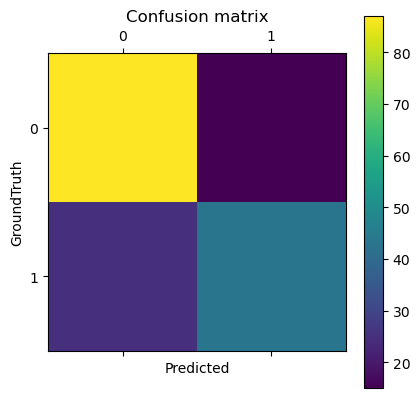

[[87 15]
 [25 43]]


In [62]:
conftable(y_test, y_pred, 'conf')

In [63]:
# Ground Truth
pd.Series(y_test).value_counts()

survived
0    102
1     68
Name: count, dtype: int64